In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
# load normalized data and true labels
scaled_data = pd.read_csv('/GSE931_scaled_top_100.csv', index_col=0)
labels = pd.read_csv('/GSE931_labels.csv',index_col=0)

# encode categorical labels to numerical codes
labels = labels['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

Label Map:
0: N
1: R


In [3]:
# fit PCA to data
pca = PCA(n_components=15)
pca.fit_transform(scaled_data)

array([[-8.32894738e+00, -2.25601972e+00, -1.77946055e+00,
        -3.19104154e+00,  4.87598638e-01,  7.42999901e-01,
         1.78009881e+00,  2.59506194e+00,  6.36709248e-01,
         1.40389325e+00,  3.08582381e+00,  2.85492557e+00,
         4.31014197e-01,  1.25832800e-02,  9.15527529e-01],
       [-2.65126701e-01, -5.51062912e+00, -5.08292249e+00,
        -1.31662978e+00,  1.58567580e-02, -8.44997050e-01,
        -4.36821665e-01, -2.38369260e+00,  3.97728443e-02,
         2.62337175e+00, -1.11620582e+00,  1.04105993e+00,
        -2.24982115e+00, -2.35014021e+00, -1.69097521e+00],
       [-6.61257261e+00,  2.07439379e+00, -2.50090062e+00,
         1.77096992e+00,  1.78392475e+00, -8.68857362e-01,
        -4.59800176e+00,  6.20369180e-01,  1.21708448e+00,
        -2.00609826e+00,  2.83345431e+00, -2.18554453e+00,
         1.26913207e+00, -1.24769057e+00,  2.85936822e-02],
       [ 7.51031655e-01, -5.55841714e+00,  3.67426916e+00,
         1.44579022e+00, -3.77603622e+00,  1.86034153

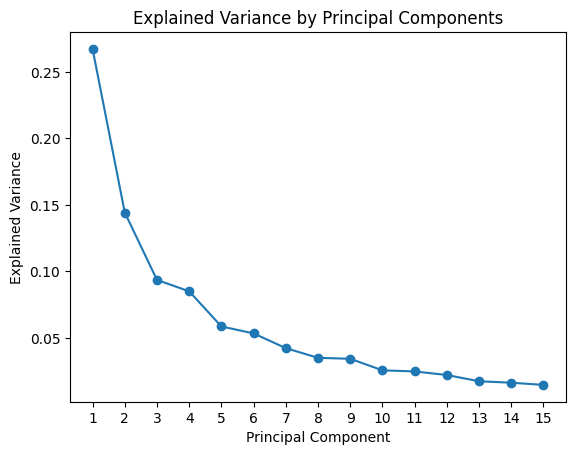

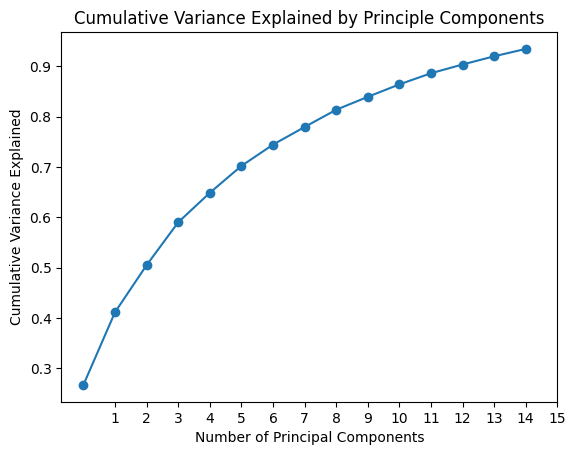

In [4]:
# use elbow method on variance explained to select optimal number of principal components
explained_variance = pca.explained_variance_ratio_

# plot explained variance against principal component
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# also check cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variance Explained by Principle Components')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Cumulative Variance Explained') ;

In [25]:
# 2 principal components seems to be optimal
pca2 = PCA(n_components=2)
PCAreduced_data = pca2.fit_transform(scaled_data)

In [27]:
# Get the loadings (coefficients) for the first three principal components
loadings = pca3.components_[:2]
# Get the absolute values of the loadings
abs_loadings = np.abs(loadings)
# Find the indices of top features for each principal component in descending order
top_features_indices = np.argsort(abs_loadings, axis=1)[:, ::-1]
# Make the column headers in scaled_data as a list
genes = list(scaled_data.columns)
print(genes)
# Get the names of features corresponding to the top indices
top_features = [genes[idx] for idx in top_features_indices.flatten()]
print(top_features)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
['50', '77', '80', '72', '82', '81', '51', '56', '68', '30', '9', '60', '65', '21', '41', '66', '45', '88', '93', '99', '43', '74', '39', '57', '28', '89', '79', '29', '78', '63', '76', '54', '85', '8', '46', '7', '59', '0', '73', '58', '33', '23', '25', '49', '90', '40', '18', '24', '48', '5', '37', '69', '10', '64', '3', '87', '27', '36', '62', '52', '61', '6', '92', '70', '86', '97', '75', '20', '44', '

In [28]:
# To find the gene names of the top contributing genes of the PCA
log_2_data = pd.read_csv('/GSE931_log2_top100.csv')
Gene1 = log_2_data.columns[50+1]
print('Gene1:', Gene1)
Gene2 = log_2_data.columns[77+1]
print('Gene2:',Gene2)

Gene1: CD79B
Gene2: BTLA


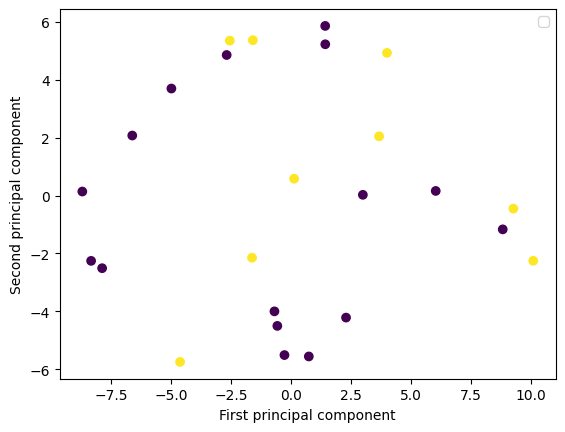

In [29]:
plt.scatter(PCAreduced_data[:, 0], PCAreduced_data[:, 1], c=labels_encoded)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

In [57]:
# Train a logistic regression model using the top 2 PCAs before optimizing hyperparameters
X_train, X_test, y_train, y_test = train_test_split(PCAreduced_data, labels_encoded, test_size = 0.3, random_state=1210)
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
print("Training accuracy before hyperparameter optimization:", training_accuracy)
print("Test set accuracy before hyperparameter optimization:", test_accuracy)

Training accuracy before hyperparameter optimization: 0.7647058823529411
Test set accuracy before hyperparameter optimization: 0.5


In [58]:
# cv of PCA (number of PCs) and L1 logistic regression

pipeline = Pipeline([
    ('pca', PCA()),
    ('clf', LogisticRegression(penalty = 'l1'))

])

hyperparameters = {
    'pca__n_components': list(range(1, 3)),
    'clf__C': [0.1, 1, 10, 100, 1000],
    'clf__solver': ['liblinear', 'saga'],
    'clf__max_iter': [10000]
}

grid_search = GridSearchCV(pipeline, hyperparameters,  cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'clf__C': 10, 'clf__max_iter': 10000, 'clf__solver': 'liblinear', 'pca__n_components': 2}


In [59]:
# Train a logistic regression model using the top 2 PCAs after optimizing hyperparameters
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)

print("Training accuracy after hyperparameter optimization:", training_accuracy)
print("Test set accuracy after hyperparameter optimization:", test_accuracy)

Training accuracy after hyperparameter optimization: 0.7647058823529411
Test set accuracy after hyperparameter optimization: 0.5
